In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cond_color
#from cond_color import get_colors, plot_start, plot_end

**Exercise 1: Plotting raw PSTHs** Plot the neurons’ PSTHs. In your report include plots for a reasonably representative handful of neurons in a small subset of conditions. Use the times array to label the times on the x-axis.

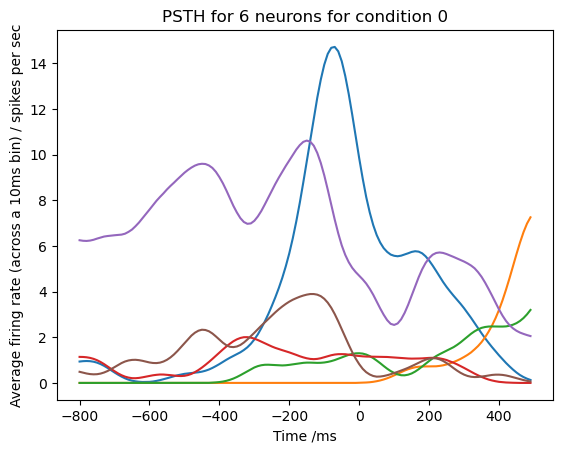

In [3]:
data = np.load(r"psths.npz")

X = data['X']  # N × C × T; N = 182 neurons; T = 130 time-bins; C = 108
spike_times = data['times'] # this counts up in 10s [-800 -790 -780 -770 -760...]

# X[i,c,t] is the average firing rate of neuron i in the t-th time bin in condition c (in units of Hz or spikes per second)
# print(X[1,:,:].shape)  # (108, 130)

c = 0 # just randonmly pick the 5th condition - we have assumed that the autonomous dynamics is the same in all conditions 
n = 6 # just picking/sampling the first 10 neuron data from the data
plt.plot(spike_times, X[:n,c,:].T)
plt.title(f'PSTH for {n} neurons for condition {c}')  # Average firing rate of 5 neurons over all experimental time.
plt.xlabel("Time /ms")
plt.ylabel("Average firing rate (across a 10ms bin) / spikes per sec")
plt.show()



*Q: What qualitative differences do you notice in the behaviour of PSTH’s in the pre-movement period
vs. during or just before hand movement?*


Pre-movement: Between -800 to -200, there is little deviation from a fairly low firing rate. 
Just before hand movement: Between -200 to 0, some samples show an increase in firing rate, with few showing an increase before -200.
During hand movement (i.e., after 0s): The neurons which had shown an increase in firing rate before 0s return generally to their original low firing rate. The neurons which had not shown an increase in firing rate before 0s now show an increase in firing rate. 


**Plot also the population average firing rate as a function of time, obtained by taking the average of
the PSTHs across neurons and conditions.**



*Q: At what time point (roughly), relative to the movement onset, does this mean rate start to rise
significantly above its baseline level (i.e., the approximate firing rate values between, say, -800ms and
-600ms, well before the movement onset)? Provide a possible explanation.*

At roughly -200ms, the mean firinf starts to rise significantly above its baseline level. Neuron firing rate is increasing because this is the time when the monkey formulates it's intention to move i.e., the monkey is planning what it wants to do with its hand and is making decisions. 




ValueError: x and y must have same first dimension, but have shapes (130,) and (182, 130)

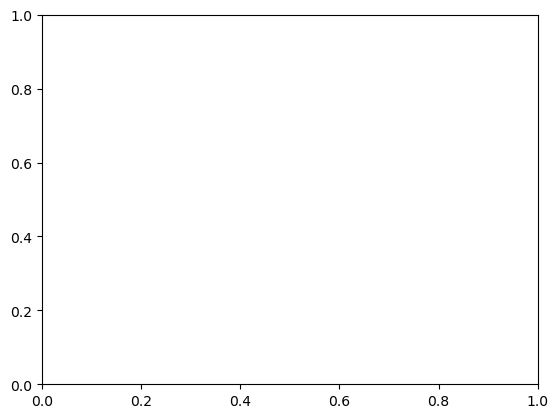

In [ ]:
# X[i,c,t] is the average firing rate of neuron i in the t-th time bin in condition c (in units of Hz or spikes per second)

mean_c = np.mean(X,dtype=np.float64, axis=1)  #
mean_c_i = np.mean(mean_c, dtype=np.float64, axis=0)

plt.plot(np.arange(-800,500,10), mean_c_i)
plt.title(f'PSTH average for all neurons across all conditions')  # Average firing rate of 5 neurons over all experimental time.
plt.xlabel("Time /ms")
plt.ylabel("Average firing rate (across a 10ms bin) / spikes per sec")
plt.show()


""" 
mean_arry = []
for t in range (0,130): #131
    i_c_matrix = X[:,:,t]
    #print(i_c_matrix.shape)
    i_matrix = np.mean(i_c_matrix, dtype=np.float64, axis=1)  # taking average across all conditions, c
    # print(i_matrix.shape)  # should be 182
    mean = np.mean(i_matrix, dtype=np.float64, axis=0)  # take average across all neurons, i
    mean_arry.append(mean)  # should be 1
 """



**Exercise 2: Preprocessing**

**(a)** Normalization: Plot a histogram of the neurons’ maximum (across conditions and time) firing rates. Then, separately for each neuron, normalize its PSTH according to: psth = (psth - b) / (a - b + 5) where psth is the PSTH of the neuron in all conditions, and a and b are,respectively, the maximum and minimum value of this neuron’s PSTH across both times and conditions.

This step ensures that the normalized activities of different neurons have the same scale and approximate range of variations. Henceforth (unless otherwise stated) we will work with this mean-centered and normalized PSTH array, which we keep denoting by X.

*Q: Why do you think this normalization step will be helpful? (You can come back to this question
after going through all exercises.)*


Normalisation is helpful so that the activity of different neurons have the same scale and same approximate range of variations. This is important when PCA is carried out, as the principal components can be correctly identified. If normalisation was not implemented, the principle components may have just been the neurons with the largest scale. 

In [180]:
# X[i,c,t] is the average firing rate of neuron i in the t-th time bin in condition c (in units of Hz or spikes per second)

for i in range(182):
    c_t_mat = X[i,:,:]
    c_t_flat = np.ndarray.flatten(c_t_mat)  # make it 1D
    maximum = max(c_t_flat)  # find max value accross time and conditions
    minimum = min(c_t_flat)
    #print(maximum, minimum)
    X[i,:,:] = (X[i,:,:] - minimum)/ (maximum - minimum + 5) # normalising


# you wanna flatten then just find the max
# print(c_t_max[0].shape)

**(b)** Mean centering: Next, remove from X its cross-condition mean (calculated and subtracted separately for each time bin and neuron4).

Mean after centering (should be close to zero):


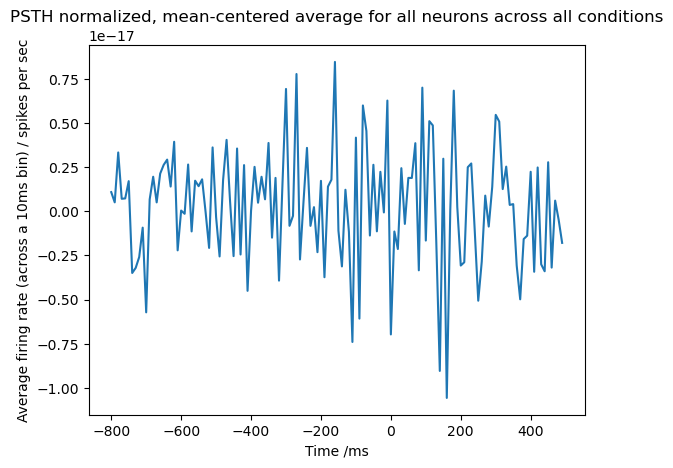

' \n# finding the new mean is it has changed after normalisation \nmean_c = np.mean(X[:,:,:],dtype=np.float64, axis=1)  # taking average across all conditions, c\nmean_c_i = np.mean(mean_c, dtype=np.float64, axis=0)  # taking average across all neurons, i -- dont need to do this step\n#mean_c_i = np.mean(mean_c_i, dtype=np.float64, axis=0)\n\nprint(mean_c_i.shape) # should be 130\nprint(X.shape)\n#print(X[1,1,:10])\n\nmeancentredX = X - mean_c_i \nprint(meancentredX.shape)\n'

In [181]:
# Calculate the mean across conditions for each neuron and time bin
mean_c = np.mean(X, axis=1, dtype=np.float64)  # Shape (N, T); # taking average across all conditions, c

# Reshape mean for broadcasting
mean_c_expanded = np.expand_dims(mean_c, axis=1)  # Shape (N, 1, T)  # expanded it along the condition axis 
# i.e., you don't need to take the mean again across all neurons, i, but need to find a 2D array of mean values

# Mean-center the data
meancentredX = X - mean_c_expanded

# Check the mean to ensure it is close to zero
mean_check = np.mean(meancentredX, axis=1)
print("Mean after centering (should be close to zero):")

# Plot to confirm
mean_c_i2 = np.mean(meancentredX, axis=(0, 1), dtype=np.float64)  # Average over all neurons and conditions
plt.plot(np.arange(-800, 500, 10), mean_c_i2)
plt.title(f'PSTH normalized, mean-centered average for all neurons across all conditions')
plt.xlabel("Time /ms")
plt.ylabel("Average firing rate (across a 10ms bin) / spikes per sec")
plt.show()

""" 
# finding the new mean is it has changed after normalisation 
mean_c = np.mean(X[:,:,:],dtype=np.float64, axis=1)  # taking average across all conditions, c
mean_c_i = np.mean(mean_c, dtype=np.float64, axis=0)  # taking average across all neurons, i -- dont need to do this step
#mean_c_i = np.mean(mean_c_i, dtype=np.float64, axis=0)

print(mean_c_i.shape) # should be 130
print(X.shape)
#print(X[1,1,:10])

meancentredX = X - mean_c_i 
print(meancentredX.shape)
"""



**(c)** Dimensionality reduction by PCA: From this step until exercise 6 below we will only work
with the PSTHs limited to the interval from−150ms to +300ms relative to movement onset (we
will however keep using X to denote the corresponding slice of the normalized and mean-removed
PSTH array, and use T to denote the number of time bins, now equal to 46, in this interval).


Reshape X into a N ×CT matrix by combining its condition and time axes, then use PCA
to obtain a dimensionality-reduced version of it by projecting onto the first M = 12 principle
components in the neuron activity space. Denote the resulting M ×CT = 12 ×4968 array
by Z and its components by Zi,n. To obtain Z, use Equation (18) of the notes on the pPCA
lecture, 02 pPCA notes.pdf (and NOT Eq. (17) of the notes). Keep the constructed matrix VM
(appearing in Eq. (18) of the notes and defined therein) for later use below in exercise 6.

In [ ]:
# X[i,c,t] is the average firing rate of neuron i in the t-th time bin in condition c (in units of Hz or spikes per second)

X = meancentredX[:,:,65:111]  # if we include t = 300 then do 65:111
print(X.shape)

Xreshaped = np.reshape(X, newshape=(182, 108*46))
print(Xreshaped.shape)



(182, 108, 46)
(182, 4968)


In [183]:
sample_cov_mat = (1 / (108 * 46)) * (Xreshaped @ Xreshaped.T)
print(sample_cov_mat.shape)

eigvals, eigvects = np.linalg.eigh(sample_cov_mat)  # Use eigh for symmetric matrices
print(eigvects.shape)

# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]  # sort and reverse list
eigvals = eigvals[sorted_indices]
eigvects = eigvects[:, sorted_indices]

M = 12
V_m = eigvects[:, :M]  # V_M now has shape (N, M)

# Projecting the data onto the selected eigenvectors (principal components)
Z = V_m.T @ Xreshaped  # Shape of Z is (M, C*T)
print(Z.shape)


(182, 182)
(182, 182)
(12, 4968)


*Little explanation on eigenvectors and eigenvalues of X*

Each eigenvector repesents a specific pattern or 'mode' of neural activity. The first eigenvector (associated with the largest eigenvalue) represents the direction with the greatest variance in the data – it captures the most prominent pattern of neural activity across neurons.

The Latent Space Representation
When you project the original high-dimensional data (neuronal activities) onto these principal components (the columns of Vm) you get matrix Z, which is a lower-dimensional representation of the data. We can analyze patterns or trajectories of neural activity in a low-dimensional space.

Dimensionality reduction works here because a lot of the structure in neural activity can be captured in a few dimensions. Vm captures the most important patterns of variance. 

**Exercise 3: Plotting PC space trajectories:** Make a plot of trajectories in the PC1-PC2 plane (corresponding
to 0 and 1 left-indices of Z, which for plotting you would reshape back into a 3D array). Superimpose
the trajectories for all conditions in the same plot. To standardize plots and make them more readable,
use the provided function cond color.get colors6 which receives as input the x and y coordinates
of the initial points (i.e., at -150 ms) of the trajectories in different conditions, and outputs the colors
in which you should plot the trajectories of different conditions.7 The returned colors are in a for-
mat that can be used with matplotlib plotting functions. Also use the cond color.plot start and
cond color.plot end functions to mark the start and end of each trajectory with special markers,
in the same color as the trajectory (play with the markersize input to these functions to achieve a
reasonable marker size).

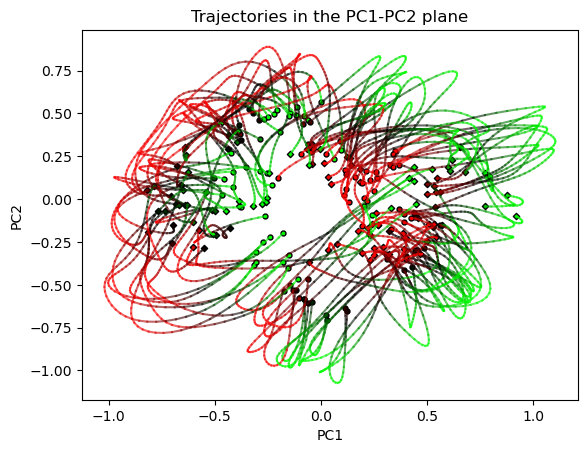

In [199]:
from cond_color import get_colors #, plot_start, plot_end
# Select the first two principal components
V_PC1_PC2 = V_m[:, :2]  # Shape (N, 2)

# Project the data onto the PC1-PC2 plane
Z_PC1_PC2 = V_PC1_PC2.T @ Xreshaped  # Shape (2, C * T)

# now we want to reshape the data to separate conditions and time
Z_PC1_PC2reshaped = np.reshape(Z_PC1_PC2, newshape=(2, 108, 46))


for c in range(108):
     # just randonmly pick the 5th condition - we have assumed that the autonomous dynamics is the same in all conditions 
     # plt.plot(Z_PC1_PC2reshaped[0,c,:], Z_PC1_PC2reshaped[1,c,:])
    xs, ys = Z_PC1_PC2reshaped[0,c,:], Z_PC1_PC2reshaped[1,c,:]
    colours = get_colors(xs, ys, alt_colors=False)# Get the color mapping
    #print(len(colours))
    #plt.plot(xs, ys, color = colours[c%46], alpha=0.6)
    #cond_color.plot_start(xs[:,0], ys[:,0], colours, markersize=5)
 
    for i in range(len(xs) - 1):  # Loop over consecutive points
        plt.plot(xs[i:i+2], ys[i:i+2], color=colours[i], alpha=0.6)
    # Mark the start of the trajectory
    cond_color.plot_start(xs[0], ys[0], colours[0], markersize=50)
    # Mark the end of the trajectory
    cond_color.plot_end(xs[-1], ys[-1], colours[-1], markersize=10)

# plot_start(xs, ys, colours, markersize=5, ax=None)
# plot_end(xs, ys, colours, markersize=5, ax=None)
# plt.title(f'PSTH for condition {c}')  # Average firing rate of 5 neurons over all experimental time.
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Trajectories in the PC1-PC2 plane')
plt.show()


**4. Finding the maximum-likelihood estimate for A:**



(a) Log-likelihood and its (naive) gradient: Write an expression for the log-likelihood (to be
maximized in terms of A) of the model in Equation (2), given the data contained in Z; ignore
terms that are independent of A, and set σ to 1 for simplicity. 

Derive an expression for the
gradient of the log-likelihood with respect to A; you may find it easier to write matrix products,
etc., as explicit sums over indices and then take partial derivatives with respect to individual
matrix elements Aij . Eventually express the gradient in matrix form in terms of Z and ∆Z,
where ∆Z is defined to be the 2D array containing the temporal-differences of Z.
footnote 8!)

Denote the K-dimensional vector of these parameters by β, with components βa (a = 1,...K)
corresponding to Aij (j > i) ordered in a fixed way, say, according to the row-major order; we
take βto be a row vector. Since the elements of Aare linearly related to βa (in an obvious way),
we can write the elements of A as linear combinations of βa:
where the coefficients Ha,i,j take values in {−1,0,+1}. Construct the 3D array H that achieves
this, and test it by making sure it constructs the correct Avia Equation (3) applied to an example
βof your choice (with non-repetitive components); you can run the test for small M, say 4.9

In [201]:
#beta = np.arange(0,12,1) # consider the first row of a matrix A?
#print(beta)

def createMatrixH(M):
    K = int(M*(M-1)*0.5)
    H = np.zeros((K, M, M))

    a = 0 # a = beta index; also the index for row of the KxMxM matrix
    for i in range(M):  # a = row, i = column, j = into the page
        for j in range(i+1, M):  # Upper triangular indices
            H[a,i,j] = 1
            H[a,j,i] = -1
            a += 1
    return H, K

M = 12
H, K = createMatrixH(M)
print(H.shape)


(66, 12, 12)


In [202]:
print(Z.shape)  # (12, 4968)
Zreshaped = np.reshape(Z, newshape=(M, 108, 46)) # Reshape to trials and time steps
print(Zreshaped.shape)  # (12, 108, 46)

deltaZ = np.zeros((M, 108, 45))  # One less time bin
for t in range(45):   # Compute time differences
    deltaZ[:,:,t] = Zreshaped[:,:,t+1] - Zreshaped[:,:,t]
print(deltaZ.shape)  # (12, 108, 45)
deltaZ = np.reshape(deltaZ, newshape=(M, 108*45))  # Reshape to (M, T-1)
print(deltaZ.shape)  # (12, 4860)

deltaZ_flat = deltaZ.flatten()
print(deltaZ_flat.shape)


(12, 4968)
(12, 108, 46)
(12, 108, 45)
(12, 4860)
(58320,)


In [203]:
print(Z.shape)  # (12, 4968)
#Zreshaped = np.reshape(Z[:,108*45], newshape=(M, 108 * 45)) # Reshape to trials and time steps
Zsliced = Z[:,:108*45]
print(Zsliced.shape)  # (12, 108, 45)

(12, 4968)
(12, 4860)


In [204]:
# Compute W = H * Z
W = np.tensordot(H, Zsliced, axes=1)
print(W.shape)

W_flat = W.reshape(K, M * 4860)
print(W_flat.shape)

(66, 12, 4860)
(66, 58320)


In [205]:
b = W_flat @ deltaZ_flat
print(b.shape)  # should be a K-dimensional vector

(66,)


In [206]:
Q = W_flat @ W_flat.T
print(Q.shape)  # should be K x K

(66, 66)


In [207]:
beta = np.linalg.solve(Q,b)
print(beta.shape)

(66,)


(d) An antisymmetric estimate for A: Using the obtained expression for the gradient, compute
the maximum-likelihood estimate for βand the corresponding A.
11 Make a color plot of A.
12

(12, 12)


Text(0.5, 1.0, 'Colour plot of A for ML beta')

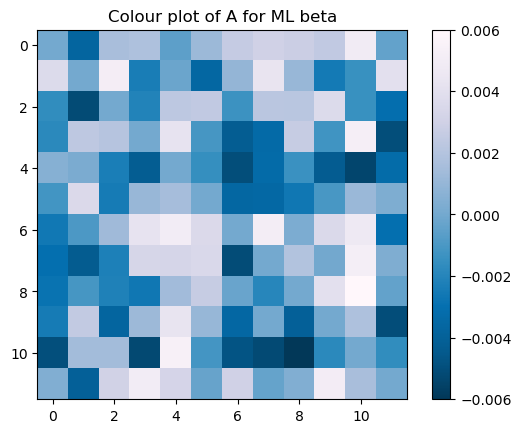

In [208]:
A = np.tensordot(beta, H, axes=1)
print(A.shape)
imshow = plt.imshow(A, cmap='PuBu_r')
cbar = plt.colorbar(imshow)
plt.title(f"Colour plot of A for ML beta")

(e) Test: To test your full algorithm for estimating A (written as a function that only receives Z
and outputs the estimate for A), download the file test.npz, which contains two arrays, Z test
and A test. Pass Z test to your function and check that the maximum absolute value differences
between elements of your estimated A and the A test array from the file (the ground truth A),
are small (say, do not exceed 10−8, although achieving a much better accuracy is also possible13).

NpzFile 'test.npz' with keys: Z_test, A_test
(12, 108, 46)
(12, 12)


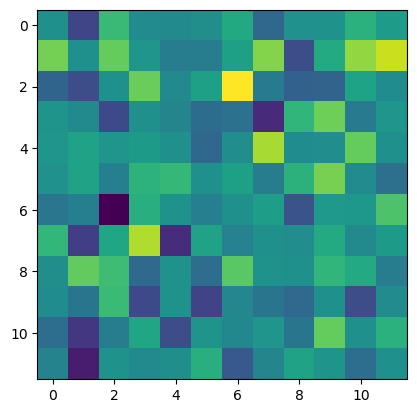

In [209]:
testdata = np.load(r"test.npz")

print(testdata)
Ztest = testdata['Z_test']
print(Ztest.shape)  # (12, 108, 46)
Atest = testdata['A_test'] 
print(Atest.shape)  # (12, 12)
plt.imshow(Atest)

In [210]:
def createMatrixH(M):
    K = int(M*(M-1)*0.5)
    H = np.zeros((K, M, M))

    a = 0 # a = beta index; also the index for row of the KxMxM matrix
    for i in range(M):  # a = row, i = column, j = into the page
        for j in range(i+1, M):  # Upper triangular indices
            H[a,i,j] = 1
            H[a,j,i] = -1
            a += 1
    return H, K

def createZ(Z, M):
    print(Z.shape)  # (12, 108, 46)

    deltaZ = np.zeros((M, 108, 45))  # One less time bin
    for t in range(45):   # Compute time differences
        deltaZ[:,:,t] = Z[:,:,t+1] - Z[:,:,t]
    print(deltaZ.shape)  # (12, 108, 45)
    deltaZ = np.reshape(deltaZ, newshape=(M, 108*45))  # Reshape to (M, T-1)
    print('deltaZ', deltaZ.shape)  # (12, 4860)

    deltaZ_flat = deltaZ.flatten()
    print('deltaZflat', deltaZ_flat.shape)

    print('Z', Z.shape)  # (12, 108, 46)
    #Zreshaped = np.reshape(Z[:,108*45], newshape=(M, 108 * 45)) # Reshape to trials and time steps
    Zsliced = Z[:,:,:45]
    print("Zsliced", Zsliced.shape)  # (12, 108, 45)

    return deltaZ, deltaZ_flat, Zsliced

def createW(H, Zsliced):
    # Compute W = H * Z
    W = np.tensordot(H, Zsliced, axes=1)
    print("W", W.shape)

    W_flat = W.reshape(K, M * 4860)
    print(W_flat.shape)
    return W, W_flat

""" 
def findBetaTensor(W, deltaZ):
    #b = W_flat @ deltaZ_flat
    #print(b.shape)  # should be a K-dimensional vector
    b = np.tensordot(W, deltaZ, axes=((1,2),(0,1))) # (1,2),(0,1)
    # Q 1212
    Q = np.tensordot(W, W, axes=((1,2),(1,2))) # (1,2),(1,2)
    print(Q.shape)  # should be K x K

    beta = np.linalg.solve(Q,b)
    print(beta.shape)
    return beta
 """
def findBeta(W_flat, deltaZ_flat):
    b = W_flat @ deltaZ_flat
    print(b.shape)  # should be a K-dimensional vector
    Q = W_flat @ W_flat.T
    print(Q.shape)  # should be K x K

    beta = np.linalg.solve(Q,b)
    print(beta.shape)
    return beta


def findA(beta, H):
    A = np.tensordot(beta, H, axes=1)
    return A



In [266]:
M = 12

def createA(M, Z):
    H, K = createMatrixH(M)

    deltaZ, deltaZ_flat, Zsliced = createZ(Z, M)

    W, W_flat = createW(H, Zsliced)

    beta = findBeta(W_flat, deltaZ_flat)

    A = findA(beta, H)

    return A


""" plt.imshow(Atest)
plt.show()
plt.imshow(A)
plt.show() """
""" error = abs(A - Atest)
plt.plot(error, alpha = 0.7)
plt.title(f"Absolute error between estimated A and ground truth A")
plt.xlabel("")
plt.ylabel("Absolute error")
plt.show() """

' error = abs(A - Atest)\nplt.plot(error, alpha = 0.7)\nplt.title(f"Absolute error between estimated A and ground truth A")\nplt.xlabel("")\nplt.ylabel("Absolute error")\nplt.show() '

**5. 2D projections with rotational dynamics:**
(a) For even M, every rotation in M-dimensional space can be decomposed into independent 2D
rotations in M/2 orthogonal 2D planes (that only meet at the origin). In the case of our matrix A,
which represents an infinitesimal rotation, these special 2D planes are related to the eigenvectors
of A, as follows. The eigenvalues of an antisymmetric matrix are all pure imaginary, and come in
complex conjugate pairs; in other words, they are all of the form ±jωfor real and positive ω(where
j= √−1). The pair of eigenvectors corresponding to a pair of complex conjugate eigenvalues are
also complex conjugates of each other. It turns out that the real and imaginary parts of (either
one) of these two eigenvectors constitute a pair of orthogonal real vectors that span one of the
M/2 special 2D planes. The imaginary part of the corresponding eigenvalue (i.e., ω in the above
notation) then provides the angular velocity of the rotation in that special 2D plane.
**Find the eigenvalues and eigenvectors of the estimated A.**

In [267]:
eigvals, eigvects = np.linalg.eig(A)
IMAGeigvals = np.imag(eigvals)
print(IMAGeigvals)
print(eigvals)
print(eigvects)

[ 0.03539286 -0.03539286  0.02598065 -0.02598065  0.02109516 -0.02109516
  0.0124237  -0.0124237   0.0087921  -0.0087921   0.00117435 -0.00117435]
[-4.68814468e-19+0.03539286j -4.68814468e-19-0.03539286j
  4.68167635e-97+0.02598065j  4.68167635e-97-0.02598065j
 -2.89815430e-19+0.02109516j -2.89815430e-19-0.02109516j
  2.39653539e-19+0.0124237j   2.39653539e-19-0.0124237j
 -5.55984931e-20+0.0087921j  -5.55984931e-20-0.0087921j
 -2.64298626e-19+0.00117435j -2.64298626e-19-0.00117435j]
[[-0.06070006-1.41976819e-01j -0.06070006+1.41976819e-01j
  -0.07861172+2.30899633e-01j -0.07861172-2.30899633e-01j
  -0.0816528 +1.56060277e-01j -0.0816528 -1.56060277e-01j
  -0.06609076-3.61670654e-01j -0.06609076+3.61670654e-01j
   0.18615044-2.12611809e-01j  0.18615044+2.12611809e-01j
   0.02425703-4.12339458e-01j  0.02425703+4.12339458e-01j]
 [-0.51468178+0.00000000e+00j -0.51468178-0.00000000e+00j
   0.25303405+1.24025450e-02j  0.25303405-1.24025450e-02j
  -0.10212517+1.08797110e-01j -0.10212517-1.087

(b) Focus first on the eigenvalue with the largest imaginary part; this eigenvalue corresponds to the
fastest special 2D rotation induced by A. Construct the 2 ×M matrix P with its two rows given
by the normalized real and imaginary parts of the eigenvector corresponding to this eigenvalue.
(Note that the real and imaginary part vectors need to be first normalized by you to have unit
length.) By applying P to Z obtain the special 2D projection of the M-dimensional trajectories,
in the special plane with the fastest rotation. We will call this special plane the plane of fastest
rotation, or FR plane for short, and will call the corresponding projection matrix PFR.

In [268]:
def createP_FR(A, Z, idx):
    eigvals, eigvects = np.linalg.eig(A)
    IMAGeigvals = np.imag(eigvals)
    sorted_indices = np.argsort(IMAGeigvals)[::-1]  # sort and reverse list
    # firsteigval = IMAGeigvals[sorted_indices][idx]
    firsteigvect = eigvects[:, sorted_indices][idx]

    # don't know if I need to normalise each row in the matrix or everything in the matrix...
    realfirsteigvect = np.real(firsteigvect)
    normrealfirsteigvect = realfirsteigvect/(np.linalg.norm(realfirsteigvect))

    imagfirsteigvect = np.imag(firsteigvect)
    normimagfirsteigvect = imagfirsteigvect / (np.linalg.norm(imagfirsteigvect))

    P_FR = np.zeros((2,M))
    print('P_FR', P_FR.shape)
    P_FR[0] = normrealfirsteigvect.T
    P_FR[1] = normimagfirsteigvect.T

    proj = np.tensordot(P_FR, Z, axes=1)

    return proj, P_FR

In [269]:
print(Zsliced.shape)
#Zslicedreshape = np.reshape(Zsliced, newshape=(M, 108*45))  # Reshape to (M, T-1)
proj, P_FR = createP_FR(A, Zsliced, 0)
print(proj.shape)

(12, 108, 45)
P_FR (2, 12)
(2, 108, 45)


(c) Plot these 2D trajectories using the same plotting and coloring conventions as in exercise 3. To
obtain a less busy plot, plot the trajectories in the sub-interval [-150ms, +200ms].


**Q: How do these trajectories differ (qualitatively) from those in exercise 3?**


The magnitude of the imaginary part determines the frequency of rotation. The eigenvalue with the largest imaginary part implies the greatest rotation angular velocity.
The results in Fig 2 show the variance of the data, while Fig 4 show rotational dynamics. In Fig 2, the trajectories are expansive and cover a large portion of the plane. The colour transitions are gradual, showing variation across time. Fig 4 shows arc-like trajectories, which emphasises that the FR plane captures the rotation caused by A. In general, the FR plane isolates the most significant rotational dynamics – that is why the structured, circular patterns are more pronounced. In contrast, the PC1-PC2 plane captures the broadest range of variance in the data, which results in more diffuse and overlapping trajectories.

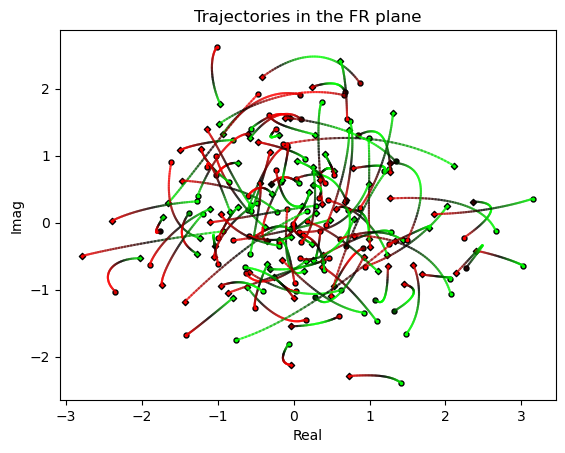

In [255]:
for c in range(108):
     # just randonmly pick the 5th condition - we have assumed that the autonomous dynamics is the same in all conditions 
     # plt.plot(Z_PC1_PC2reshaped[0,c,:], Z_PC1_PC2reshaped[1,c,:])
    xs, ys = proj[0,c,:], proj[1,c,:]
    colours = get_colors(xs, ys, alt_colors=False)# Get the color mapping
    #print(len(colours))
    #plt.plot(xs, ys, color = colours[c%46], alpha=0.6)
    #cond_color.plot_start(xs[:,0], ys[:,0], colours, markersize=5)
 
    for i in range(len(xs) - 1):  # Loop over consecutive points
        plt.plot(xs[i:i+2], ys[i:i+2], color=colours[i], alpha=0.6)
    # Mark the start of the trajectory
    cond_color.plot_start(xs[0], ys[0], colours[0], markersize=50)
    # Mark the end of the trajectory
    cond_color.plot_end(xs[-1], ys[-1], colours[-1], markersize=10)

# plot_start(xs, ys, colours, markersize=5, ax=None)
# plot_end(xs, ys, colours, markersize=5, ax=None)
# plt.title(f'PSTH for condition {c}')  # Average firing rate of 5 neurons over all experimental time.
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Trajectories in the FR plane')
plt.show()

6)Pre-movement period: Apply the projections obtained for the interval [-150ms, 300ms] to the
interval [-800ms, -150ms], which we will refer to as the pre-movement period. Specifically, combine
the exact same PC-projection matrix VM obtained in exercise 2c with the projection onto the FR
plane found in 5b to obtain the 2 ×N projection matrix PFR VT
M (where T denotes transposition),
which you will use to directly project the N dimensional trajectories during this pre-movement period
(corresponding to an appropriate slice or sub-array of the normalized and mean-centered X obtained
at the end of exercise 2b) onto the FR plane. 


Plot these trajectories superimposed on those plotted in
5c (the movement interval trajectories), but with a different color code: green replaced by cyan and
red by magenta. To this end, use cond color.get colors as in 3 and 5c, but with the optional input
alt colors set to True, and with the xs and ys inputs now giving the coordinates of the final points
of the pre-movement period trajectories. (In order to make this joint plot less busy, feel free to reduce
the alpha value15 of the plotted trajectories during the movement period, which were already plotted
separately in 5c.)


Q: How do these trajectories differ from the ones after movement-related activity has begun?


Q: Assuming the rotational dynamics observed during the period of movement-related activity is indeed
autonomous, how can you interpret the projected trajectories during the preceding (pre-movement)
interval? Think about the epoch in the task: what does the monkey

In [ ]:

""" # Projecting the data onto the selected eigenvectors (principal components)
Z = V_m.T @ Xreshaped  # Shape of Z is (M, C*T)
print(Z.shape) """

In [261]:
PreN, PreC, PreT, M = 182, 108, 66, 12
PreMovementX = meancentredX[:,:,:PreT]

def createVm(PreMovementX, M):
    PreMovementXreshaped = np.reshape(PreMovementX, newshape=(PreN, PreC*PreT))
    Pre_sample_cov_mat = (1 / (PreC*PreT)) * (PreMovementXreshaped @ PreMovementXreshaped.T)
    print(sample_cov_mat.shape)
    eigvals, eigvects = np.linalg.eigh(Pre_sample_cov_mat)  # Use eigh for symmetric matrices
    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigvals)[::-1]  # sort and reverse list
    #eigvals = eigvals[sorted_indices]
    eigvects = eigvects[:, sorted_indices]
    M = 12
    V_m = eigvects[:, :M]  # V_M now has shape (N, M)
    # Projecting the data onto the selected eigenvectors (principal components)
    Z = V_m.T @ PreMovementXreshaped  # Shape of Z is (M, C*T)
    #print(Z.shape)
    return V_m, Z

#PreA = createA(M)
Pre_V_m, PreZ = createVm(PreMovementX, M)
print('Pre_V_m', Pre_V_m.shape)
print('PreZ', PreZ.shape)
Preproj, Pre_PFR = createP_FR(A, PreZ, 0)

print('Pre_PFR', Pre_PFR.shape)
print('Pre_V_m.T', Pre_V_m.T.shape)
Pfr_Vm = Pre_PFR @ V_m.T  # shape 2 x N projection matrix 
print(Pfr_Vm.shape)
print('Preproj', Preproj.shape)

(182, 182)
Pre_V_m (182, 12)
PreZ (12, 7128)
P_FR (2, 12)
Pre_PFR (2, 12)
Pre_V_m.T (12, 182)
(2, 182)
Preproj (2, 7128)


In [260]:
for c in range(108):
     # just randonmly pick the 5th condition - we have assumed that the autonomous dynamics is the same in all conditions 
     # plt.plot(Z_PC1_PC2reshaped[0,c,:], Z_PC1_PC2reshaped[1,c,:])
    xs, ys = Preproj[0,c,:], Preproj[1,c,:]
    colours = get_colors(xs, ys, alt_colors=False)# Get the color mapping
    #print(len(colours))
    #plt.plot(xs, ys, color = colours[c%46], alpha=0.6)
    #cond_color.plot_start(xs[:,0], ys[:,0], colours, markersize=5)
 
    for i in range(len(xs) - 1):  # Loop over consecutive points
        plt.plot(xs[i:i+2], ys[i:i+2], color=colours[i], alpha=0.6)
    # Mark the start of the trajectory
    cond_color.plot_start(xs[0], ys[0], colours[0], markersize=50)
    # Mark the end of the trajectory
    cond_color.plot_end(xs[-1], ys[-1], colours[-1], markersize=10)

# plot_start(xs, ys, colours, markersize=5, ax=None)
# plot_end(xs, ys, colours, markersize=5, ax=None)
# plt.title(f'PSTH for condition {c}')  # Average firing rate of 5 neurons over all experimental time.
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Trajectories in the FR plane')
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed